In [3]:
#

In [4]:
#Set a datetime function
start = dt.datetime(2017,1,1)
end = dt.datetime(2019,1,1)

In [5]:
#Define a data frame and load financial data into it from Yahoo Finance API
df = web.get_data_yahoo('AAPL',start,end, interval='d')

In [6]:
print(df)

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2017-01-03  29.082500  28.690001  28.950001  29.037500  115127600.0  27.297693
2017-01-04  29.127501  28.937500  28.962500  29.004999   84472400.0  27.267138
2017-01-05  29.215000  28.952499  28.980000  29.152500   88774400.0  27.405804
2017-01-06  29.540001  29.117500  29.195000  29.477501  127007600.0  27.711332
2017-01-09  29.857500  29.485001  29.487499  29.747499  134247600.0  27.965147
...               ...        ...        ...        ...          ...        ...
2018-12-24  37.887501  36.647499  37.037498  36.707500  148676800.0  35.589466
2018-12-26  39.307499  36.680000  37.075001  39.292500  234330000.0  38.095737
2018-12-27  39.192501  37.517502  38.959999  39.037498  212468400.0  37.848503
2018-12-28  39.630001  38.637501  39.375000  39.057499  169165600.0  37.867893
2018-12-31  39.840000  39.119999  39.632500  39.4350

In [7]:
#Show just the close column 
print(df['Close'])

Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
                ...    
2018-12-24    36.707500
2018-12-26    39.292500
2018-12-27    39.037498
2018-12-28    39.057499
2018-12-31    39.435001
Name: Close, Length: 502, dtype: float64


In [8]:
#Show just the close column for a specific date
print(df['Close']['2018-02-14'])

41.842498779296875


In [9]:
#Save it a csv file
df.to_csv('apple.csv', sep=";")

In [10]:
#save it to an Excel file 
df.to_excel('apple.xlsx')

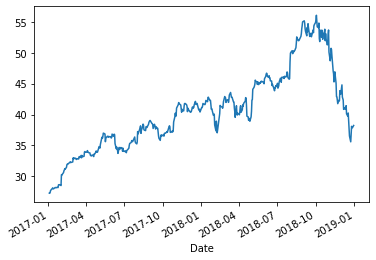

In [11]:
#Plot the Adjusted Close price with matplotlib
df['Adj Close'].plot()
plt.show()

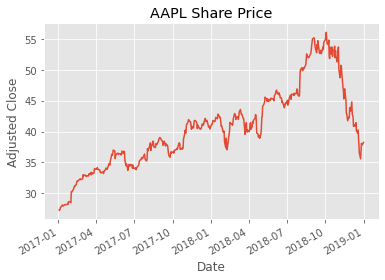

In [12]:
#Plot the graph with labels and styles
style.use('ggplot')
plt.ylabel('Adjusted Close')
plt.title('AAPL Share Price')
df['Adj Close'].plot()
plt.show()

In [13]:
#Comparing Stocks

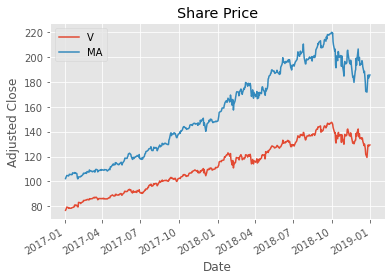

In [14]:
visa = web.get_data_yahoo('V',start,end, interval='d')
mastercard = web.get_data_yahoo('MA',start,end, interval='d')
visa['Adj Close'].plot(label="V")
mastercard['Adj Close'].plot(label="MA")
plt.ylabel('Adjusted Close')
plt.title('Share Price')
plt.legend(loc='upper left')
plt.show()

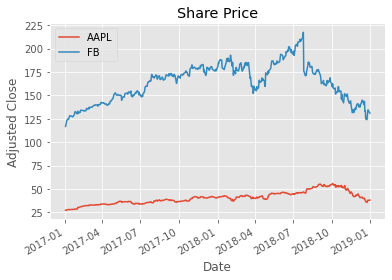

In [15]:
apple = web.get_data_yahoo('AAPL',start,end, interval='d')
facebook = web.get_data_yahoo('FB',start,end, interval='d')
apple['Adj Close'].plot(label="AAPL")
facebook['Adj Close'].plot(label="FB")
plt.ylabel('Adjusted Close')
plt.title('Share Price')
plt.legend(loc='upper left')
plt.show()

In [16]:
#Subplotting

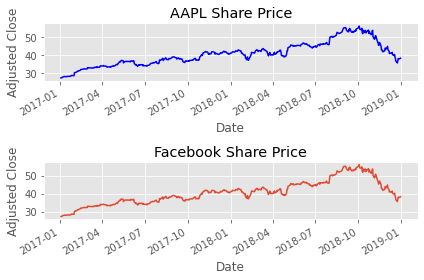

In [17]:
plt.subplot(211)
apple['Adj Close'].plot(color='blue')
plt.ylabel('Adjusted Close')
plt.title('AAPL Share Price')

plt.subplot(212)
apple['Adj Close'].plot()
plt.ylabel('Adjusted Close')
plt.title('Facebook Share Price')

plt.tight_layout()
plt.show()

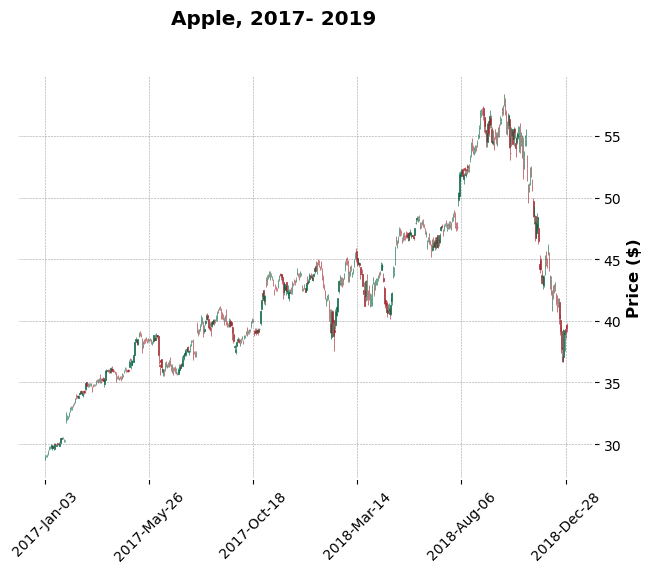

In [18]:
mpf.plot(apple, type='candle', style='charles',
            title='Apple, 2017- 2019',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded') 
         

In [19]:
#Analysis and Statistics

In [20]:
#100 Day Moving Average
apple['100d_ma'] = apple['Adj Close'].rolling(window = 100, min_periods = 0).mean()
#Remove NaN-Values
apple.dropna(inplace=True)
print(apple.head())

                 High        Low       Open      Close       Volume  \
Date                                                                  
2017-01-03  29.082500  28.690001  28.950001  29.037500  115127600.0   
2017-01-04  29.127501  28.937500  28.962500  29.004999   84472400.0   
2017-01-05  29.215000  28.952499  28.980000  29.152500   88774400.0   
2017-01-06  29.540001  29.117500  29.195000  29.477501  127007600.0   
2017-01-09  29.857500  29.485001  29.487499  29.747499  134247600.0   

            Adj Close    100d_ma  
Date                              
2017-01-03  27.297691  27.297691  
2017-01-04  27.267136  27.282413  
2017-01-05  27.405804  27.323544  
2017-01-06  27.711332  27.420491  
2017-01-09  27.965147  27.529422  


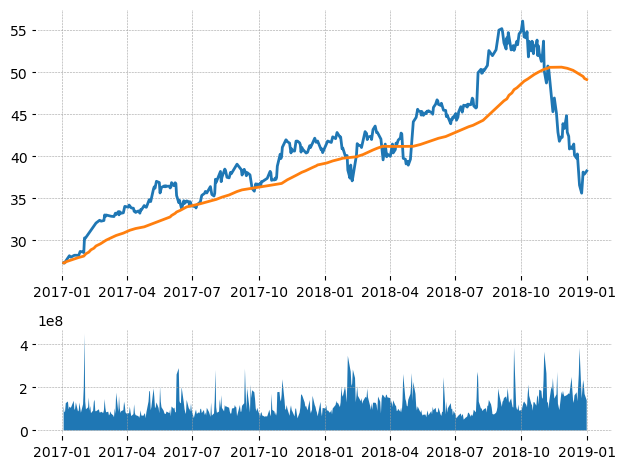

In [21]:
#Visualization
ax1 = plt.subplot2grid((6,1),(0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((6,1),(4,0), rowspan = 2, colspan = 1, sharex = ax1)

ax1.plot(apple.index, apple['Adj Close'])
ax1.plot(apple.index, apple['100d_ma'])
ax2.fill_between(apple.index, apple['Volume'])

plt.tight_layout()
plt.show()

In [22]:
#Additional Key Statistics

In [23]:
#Percentage Change
apple['PCT_Change'] = (apple['Close'] - apple['Open']) / apple['Open']
print(apple['PCT_Change'])

Date
2017-01-03    0.003022
2017-01-04    0.001467
2017-01-05    0.005952
2017-01-06    0.009676
2017-01-09    0.008817
                ...   
2018-12-24   -0.008910
2018-12-26    0.059811
2018-12-27    0.001989
2018-12-28   -0.008064
2018-12-31   -0.004983
Name: PCT_Change, Length: 502, dtype: float64


In [24]:
#High Low Percentage - How volatile the stock is
apple['HL_PCT'] = (apple['High'] - apple['Low']) / apple['Close'] 
print(apple['HL_PCT'])

Date
2017-01-03    0.013517
2017-01-04    0.006551
2017-01-05    0.009004
2017-01-06    0.014333
2017-01-09    0.012522
                ...   
2018-12-24    0.033781
2018-12-26    0.066870
2018-12-27    0.042907
2018-12-28    0.025411
2018-12-31    0.018258
Name: HL_PCT, Length: 502, dtype: float64


In [25]:
#Regression Lines
start = dt.datetime(2016,1,1)
end = dt.datetime(2019,1,1)

apple = web.get_data_yahoo('AAPL',start,end, interval='d')
data = apple['Adj Close']

#Quantify our dates in order to be able to use them as X-values
x = data.index.map(mdates.date2num)

#Use Numpy to create a linear regression line
fit = np.polyfit(x, data.values, 1)
fit1d = np.poly1d(fit)

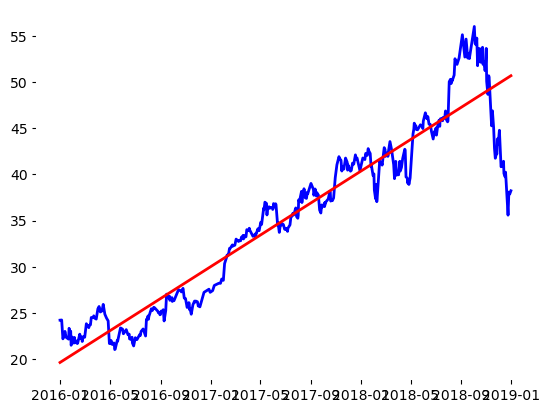

In [26]:
plt.grid()
plt.plot(data.index, data.values, 'b')
plt.plot(data.index, fit1d(x),'r')
plt.show()

In [27]:
#Setting the Time Frame
rstart = dt.datetime(2018,7,1)
rend = dt.datetime(2019,1,1)

#Create a new data frame and cut off all other data entries 
fit_data = data.reset_index()
pos1 = fit_data[fit_data.Date >= rstart].index[0]
pos2 = fit_data[fit_data.Date <= rend].index[-1]

fit_data = fit_data.iloc[pos1:pos2]

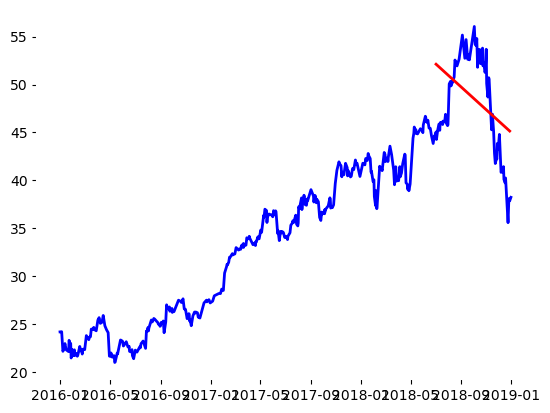

In [28]:
#Rewrite the function
dates = fit_data.Date.map(mdates.date2num)

fit = np.polyfit(dates, fit_data['Adj Close'], 1)
fit1d = np.poly1d(fit)

plt.grid()
plt.plot(data.index, data.values, 'b')
plt.plot(fit_data.Date, fit1d(dates), 'r')
plt.show()
